In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
crimeTrain = pd.read_csv("crime_train.csv")
crimeTest = pd.read_csv("crime_test.csv")

In [3]:
crimeTrain.head()

ID  population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0   1       14985           2.56        16.55        34.42        22.54   
1   2       30843           2.83        15.45        35.12        18.14   
2   3       74991           2.52        10.48        20.43         9.11   
3   4       45061           2.44        10.59        24.97        11.61   
4   5       12863           2.45        12.02        22.51        10.49   

   agePct65up  numbUrban  pctUrban  medIncome  ...  MedOwnCostPctInc  \
0       10.13          0       0.0      35545  ...              23.3   
1        4.70          0       0.0      32033  ...              21.6   
2       20.68      73342      97.8      31177  ...              23.6   
3       16.34      45061     100.0      39822  ...              24.0   
4       18.46          0       0.0      23044  ...              16.0   

   MedOwnCostPctIncNoMtg  NumInShelters  NumStreet  PctForeignBorn  \
0                   13.5              0          0            3.32   
1                   10.9             68         41            4.98   
2                   11.9              0          0            6.51   
3                   16.3              0          1           13.13   
4                   11.7              0          0            1.08   

   PctBornSameState  PctSameHouse85  PctSameCity85  PctSameState85  \
0             60.94           47.28          66.65           82.41   
1             25.24           28.17          52.73           59.20   
2             13.69           34.49          60.88           66.97   
3             67.79           65.19          84.28           91.32   
4             80.22           53.17          86.56           93.15   

   ViolentCrimesPerPop  
0               428.64  
1               742.54  
2               303.72  
3               373.88  
4               108.07  

[5 rows x 90 columns]

In [4]:
crimeTest.head()

ID  population  householdsize  agePct12t21  agePct12t29  agePct16t24  \
0   1       11874           2.11        10.54        30.87        14.08   
1   2       14143           2.68        21.01        33.35        21.95   
2   3       34882           2.32        12.56        21.79        11.29   
3   4       29885           3.53        20.10        34.33        18.31   
4   5      935933           2.86        15.89        30.35        14.98   

   agePct65up  numbUrban  pctUrban  medIncome  ...  MedRentPctHousInc  \
0        8.16      11874     100.0      30141  ...               22.9   
1       14.55          0       0.0      23886  ...               30.5   
2       19.51      34881     100.0      21053  ...               26.5   
3        8.18      29885     100.0      18956  ...               26.2   
4        9.50     935927     100.0      23584  ...               25.3   

   MedOwnCostPctInc  MedOwnCostPctIncNoMtg  NumInShelters  NumStreet  \
0              19.2                   11.4              2          1   
1              21.0                   14.9              0          0   
2              16.9                   11.8              0          9   
3              19.8                   13.8              0          0   
4              20.9                   12.7            698         44   

   PctForeignBorn  PctBornSameState  PctSameHouse85  PctSameCity85  \
0            7.02             51.78           39.89          75.63   
1            2.35             75.91           51.79          72.20   
2            1.61             74.43           62.60          86.35   
3           18.46             68.90           52.42          83.01   
4            9.35             69.25           51.62          83.78   

   PctSameState85  
0           83.39  
1           88.40  
2           90.85  
3           90.76  
4           90.95  

[5 rows x 89 columns]

In [5]:
crimeTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 90 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1595 non-null   int64  
 1   population             1595 non-null   int64  
 2   householdsize          1595 non-null   float64
 3   agePct12t21            1595 non-null   float64
 4   agePct12t29            1595 non-null   float64
 5   agePct16t24            1595 non-null   float64
 6   agePct65up             1595 non-null   float64
 7   numbUrban              1595 non-null   int64  
 8   pctUrban               1595 non-null   float64
 9   medIncome              1595 non-null   int64  
 10  pctWWage               1595 non-null   float64
 11  pctWFarmSelf           1595 non-null   float64
 12  pctWInvInc             1595 non-null   float64
 13  pctWSocSec             1595 non-null   float64
 14  pctWPubAsst            1595 non-null   float64
 15  pctW

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
crimeTrain.describe().transpose()


count           mean            std       min  \
ID                     1595.0     798.000000     460.581155      1.00   
population             1595.0   54030.413166  219519.329443  10005.00   
householdsize          1595.0       2.702514       0.341554      1.81   
agePct12t21            1595.0      14.409141       4.434560      4.68   
agePct12t29            1595.0      27.593806       6.136254      9.38   
agePct16t24            1595.0      13.944846       5.883211      4.64   
agePct65up             1595.0      11.959335       4.771171      1.66   
numbUrban              1595.0   48240.821317  220512.767743      0.00   
pctUrban               1595.0      68.973009      44.841927      0.00   
medIncome              1595.0   33679.800627   13372.347236  11576.00   
pctWWage               1595.0      78.086489       7.817646     31.68   
pctWFarmSelf           1595.0       0.907085       0.726740      0.00   
pctWInvInc             1595.0      43.279693      12.706748      7.91   
pctWSocSec             1595.0      26.551818       8.250311      4.81   
pctWPubAsst            1595.0       6.827724       4.509329      0.50   
pctWRetire             1595.0      15.980458       4.546441      3.46   
medFamInc              1595.0   39588.216301   14253.943376  13785.00   
perCapInc              1595.0   15584.867712    6321.078898   5561.00   
NumUnderPov            1595.0    7665.544201   40979.893933     78.00   
PctPopUnderPov         1595.0      11.822690       8.485543      0.73   
PctLess9thGrade        1595.0       9.341649       6.783199      0.20   
PctNotHSGrad           1595.0      22.560100      11.024080      2.09   
PctBSorMore            1595.0      23.132671      12.618475      1.63   
PctUnemployed          1595.0       6.013179       2.714504      1.32   
PctEmploy              1595.0      61.856295       8.108071     24.82   
PctEmplManu            1595.0      17.713636       8.007866      2.05   
PctEmplProfServ        1595.0      24.560815       6.555872      8.69   
PctOccupManu           1595.0      13.711229       6.395447      1.37   
PctOccupMgmtProf       1595.0      28.346533       9.342295      6.48   
MalePctDivorce         1595.0       9.225994       2.770677      2.13   
MalePctNevMarr         1595.0      30.594878       8.012581     13.07   
FemalePctDiv           1595.0      12.464715       3.231135      3.35   
TotalPctDiv            1595.0      10.932658       2.967714      2.83   
PersPerFam             1595.0       3.127028       0.247724      2.29   
PctFam2Par             1595.0      73.815956      10.293490     32.24   
PctKids2Par            1595.0      70.829749      11.860845     26.11   
PctYoungKids2Par       1595.0      81.665473      11.986038     31.47   
PctTeen2Par            1595.0      75.286846      10.166489     30.64   
PctWorkMomYoungKids    1595.0      60.592828       8.009005     24.42   
PctWorkMom             1595.0      68.885386       6.605583     41.95   
NumKidsBornNeverMar    1595.0    2160.771787   15197.064130      0.00   
PctKidsBornNeverMar    1595.0       3.176564       3.105150      0.00   
NumImmig               1595.0    6846.511599   63563.025743     20.00   
PctImmigRecent         1595.0      13.619724       9.668968      0.00   
PctImmigRec5           1595.0      20.678495      12.235602      0.00   
PctImmigRec8           1595.0      28.061962      14.202081      0.00   
PctImmigRec10          1595.0      35.462038      16.072288      0.00   
PctRecentImmig         1595.0       1.150458       1.681364      0.00   
PctRecImmig5           1595.0       1.785843       2.599160      0.00   
PctRecImmig8           1595.0       2.436470       3.474826      0.00   
PctRecImmig10          1595.0       3.111812       4.505203      0.00   
PctSpeakEnglOnly       1595.0      86.801072      14.264746      6.15   
PctNotSpeakEnglWell    1595.0       2.501129       4.400714      0.00   
PctLargHouseFam        1595.0       5.454784       3.939503      0.96   
PctLargHo

In [7]:
crimeTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 89 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     399 non-null    int64  
 1   population             399 non-null    int64  
 2   householdsize          399 non-null    float64
 3   agePct12t21            399 non-null    float64
 4   agePct12t29            399 non-null    float64
 5   agePct16t24            399 non-null    float64
 6   agePct65up             399 non-null    float64
 7   numbUrban              399 non-null    int64  
 8   pctUrban               399 non-null    float64
 9   medIncome              399 non-null    int64  
 10  pctWWage               399 non-null    float64
 11  pctWFarmSelf           399 non-null    float64
 12  pctWInvInc             399 non-null    float64
 13  pctWSocSec             399 non-null    float64
 14  pctWPubAsst            399 non-null    float64
 15  pctWRe

feature selection

<AxesSubplot:>

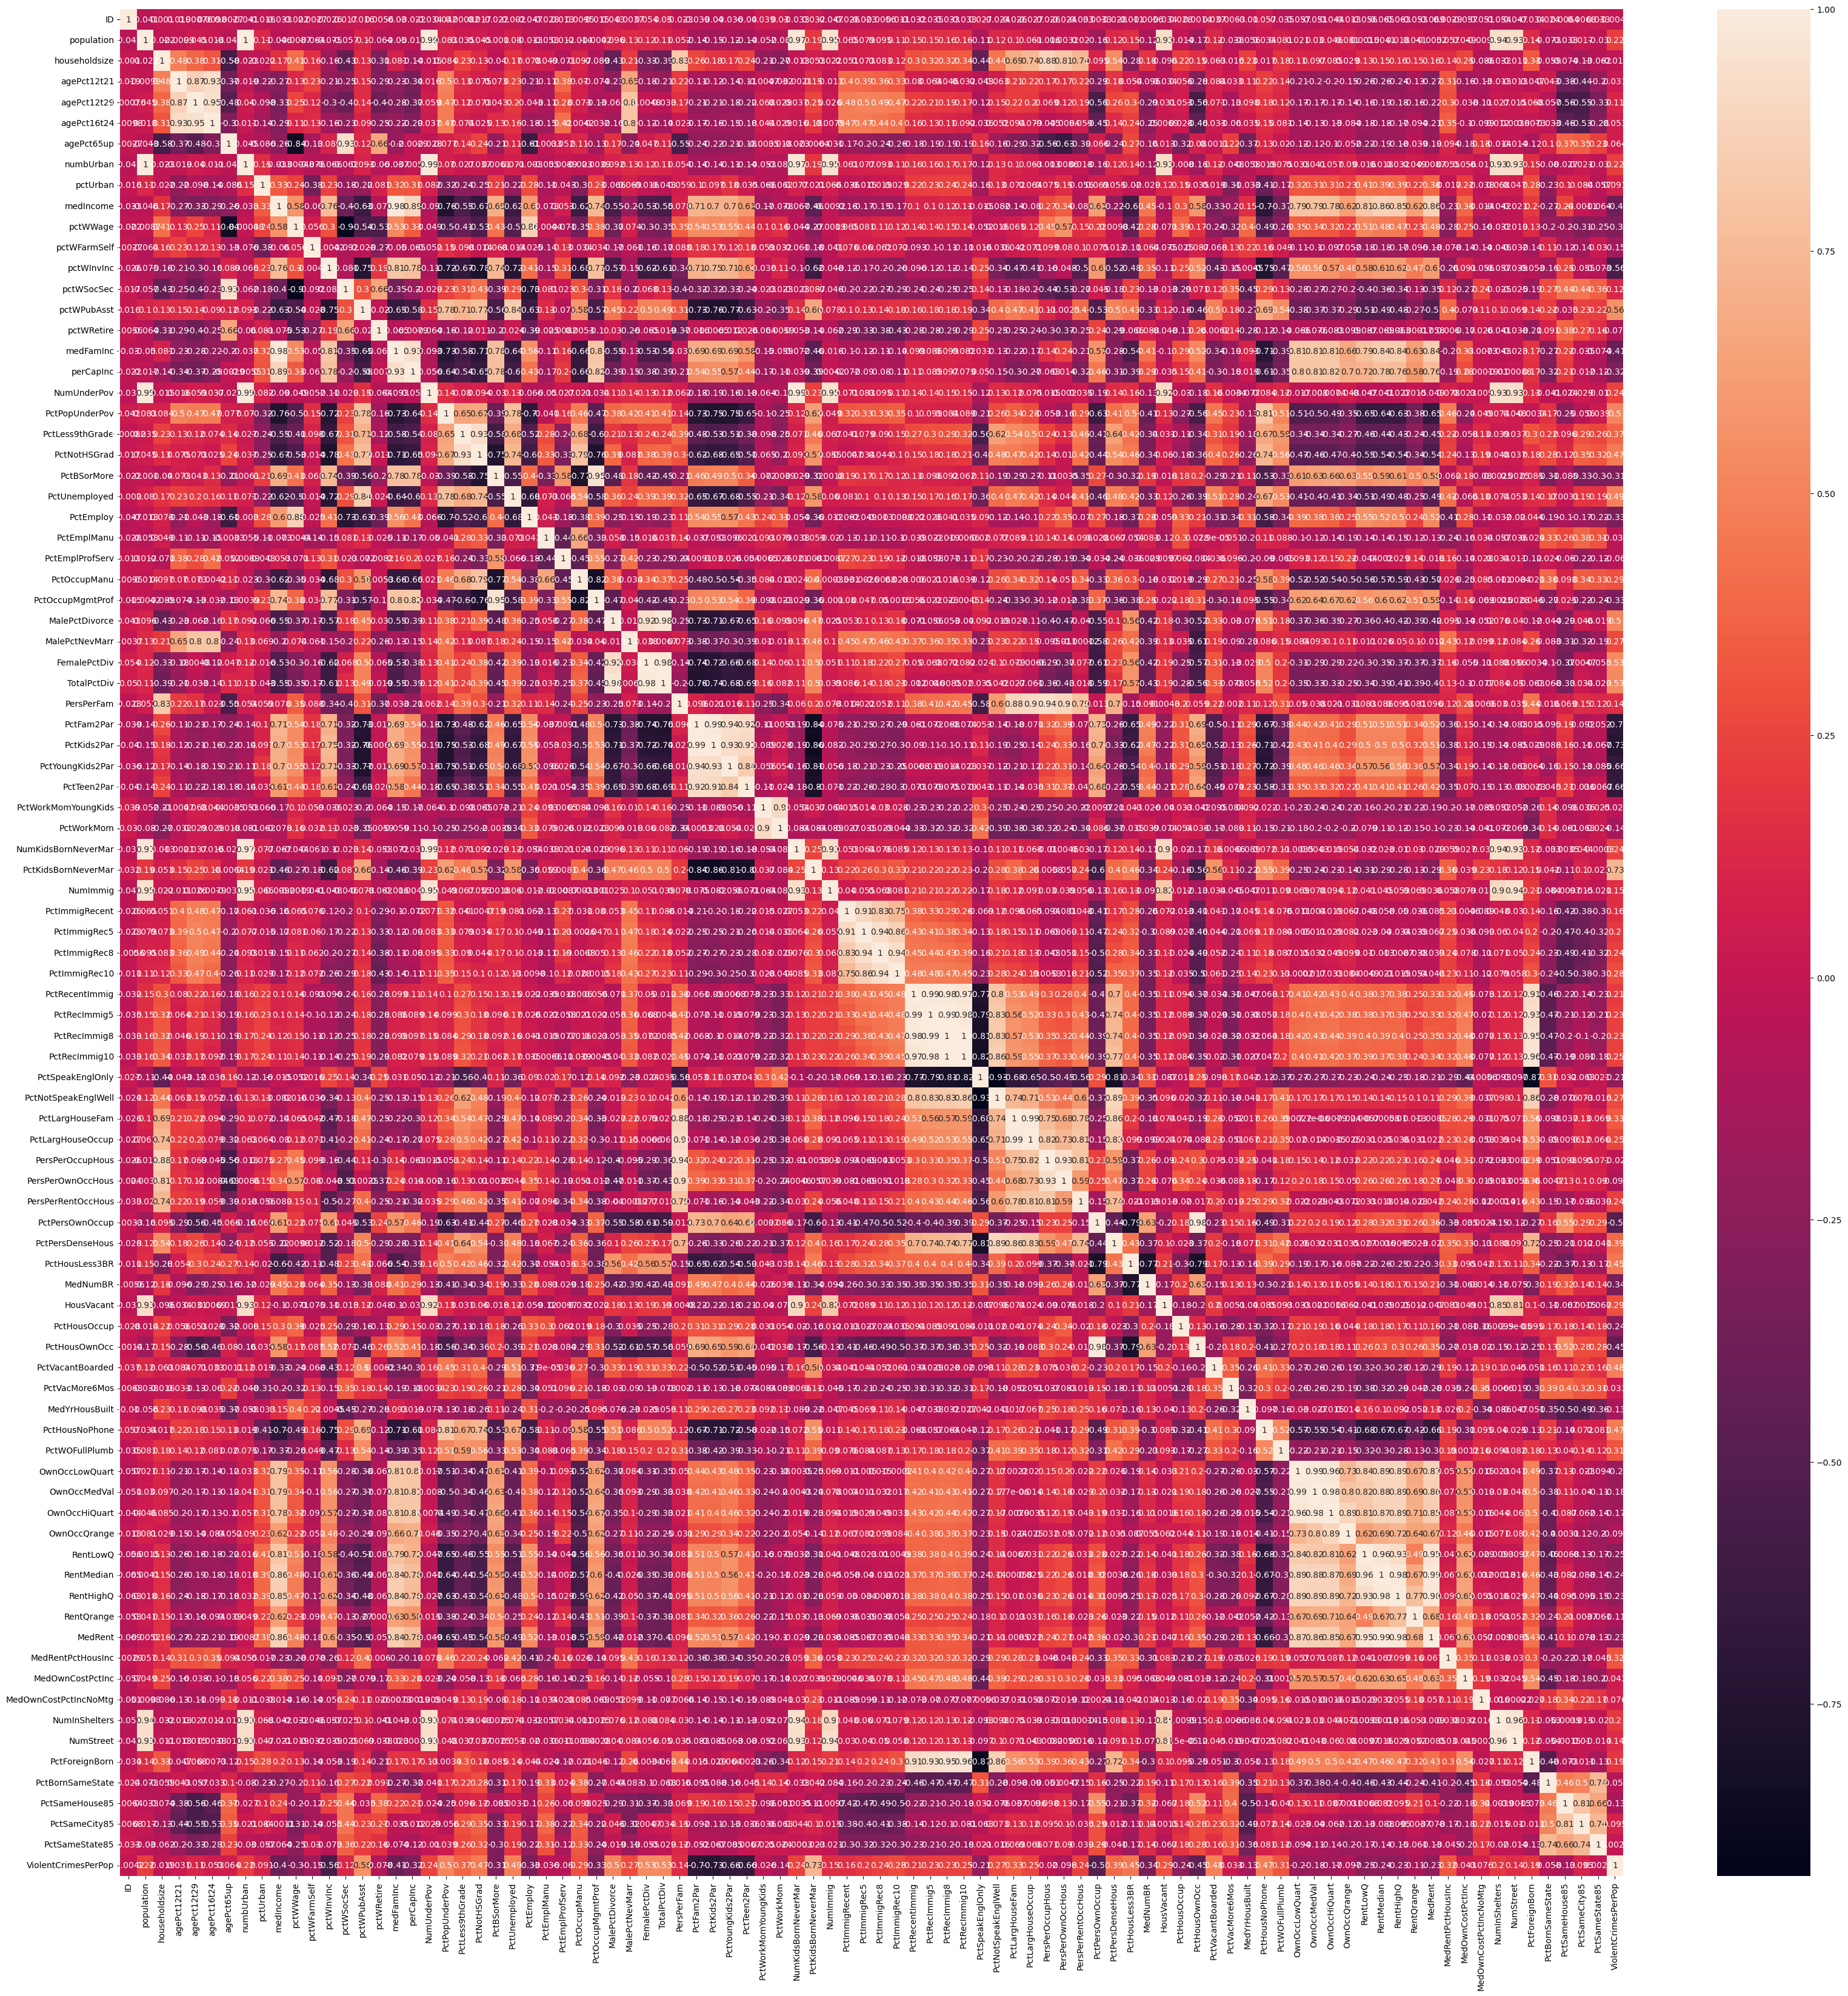

In [8]:
cor = crimeTrain.corr()

plt.figure(figsize = (40, 40))
sns.heatmap(cor, annot = True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = crimeTrain.drop(["ViolentCrimesPerPop", "ID"], axis = 1)
y = crimeTrain["ViolentCrimesPerPop"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [13]:
lm.intercept_

-5005.071221502283

In [14]:
lm.coef_

array([ 3.40714724e-03,  1.62410621e+01,  3.67040688e+00, -1.04471984e+01,
       -8.01340814e-01,  8.57623531e+00, -3.00892355e-03,  1.90036716e+00,
       -2.27784734e-02, -7.38451889e+00,  3.76225455e+01, -5.04298651e+00,
        8.98300602e+00,  4.68342571e+00, -7.53499418e+00,  2.28050662e-02,
       -8.68307579e-03, -4.67399837e-03,  9.27273319e-01, -1.14211765e+01,
        3.73751771e+00,  7.20044922e+00,  8.29078679e+00,  1.30398352e+01,
       -3.85761479e+00,  2.05706076e+00, -3.27102616e+00, -2.39677027e+00,
        2.44738039e+02, -2.09231560e+00,  2.10469849e+02, -4.34118004e+02,
       -8.92812466e+02,  4.02017240e+00, -1.99583820e+01,  2.23994011e+00,
        4.78810519e-01,  2.68483863e+00, -8.76361490e+00,  1.56445245e-03,
        6.37057517e+01, -1.49221256e-03,  3.68504789e+00,  1.39003550e+00,
        1.65063142e+00, -3.96162303e+00, -6.26774816e+00, -6.31109475e+01,
       -1.00375276e+01,  5.31501746e+01,  6.85885541e+00, -8.82296414e-01,
        4.54572366e+01, -

In [15]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
population                0.003407
householdsize            16.241062
agePct12t21               3.670407
agePct12t29             -10.447198
agePct16t24              -0.801341
agePct65up                8.576235
numbUrban                -0.003009
pctUrban                  1.900367
medIncome                -0.022778
pctWWage                 -7.384519
pctWFarmSelf             37.622545
pctWInvInc               -5.042987
pctWSocSec                8.983006
pctWPubAsst               4.683426
pctWRetire               -7.534994
medFamInc                 0.022805
perCapInc                -0.008683
NumUnderPov              -0.004674
PctPopUnderPov            0.927273
PctLess9thGrade         -11.421177
PctNotHSGrad              3.737518
PctBSorMore               7.200449
PctUnemployed             8.290787
PctEmploy                13.039835
PctEmplManu              -3.857615
PctEmplProfServ           2.057061
PctOccupManu             -3.271026
PctOccupMgmtProf         -2.396770
MalePctDivorce          244.738039
MalePctNevMarr           -2.092316
FemalePctDiv            210.469849
TotalPctDiv            -434.118004
PersPerFam             -892.812466
PctFam2Par                4.020172
PctKids2Par             -19.958382
PctYoungKids2Par          2.239940
PctTeen2Par               0.478811
PctWorkMomYoungKids       2.684839
PctWorkMom               -8.763615
NumKidsBornNeverMar       0.001564
PctKidsBornNeverMar      63.705752
NumImmig                 -0.001492
PctImmigRecent            3.685048
PctImmigRec5              1.390036
PctImmigRec8              1.650631
PctImmigRec10            -3.961623
PctRecentImmig           -6.267748
PctRecImmig5            -63.110948
PctRecImmig8            -10.037528
PctRecImmig10            53.150175
PctSpeakEnglOnly          6.858855
PctNotSpeakEnglWell      -0.882296
PctLargHouseFam          45.457237
PctLargHouseOccup       -78.226440
PersPerOccupHous        639.647074
PersPerOwnOccHous       769.640148
PersPerRentOccHous     -309.017998
PctPersOwnOccup         -50.796237
PctPersDenseHous         23.380523
PctHousLess3BR            3.537544
MedNumBR                 31.950835
HousVacant                0.016778
PctHousOccup             -1.914909
PctHousOwnOcc            46.468414
PctVacantBoarded         17.216241
PctVacMore6Mos           -2.537152
MedYrHousBuilt            2.888762
PctHousNoPhone           10.878501
PctWOFullPlumb          -97.486963
OwnOccLowQuart            0.000773
OwnOccMedVal             -0.001231
OwnOccHiQuart             0.000376
OwnOccQrange             -0.000395
RentLowQ                 -0.535537
RentMedian               -0.341017
RentHighQ                -0.475384
RentQrange                0.060153
MedRent                   1.465411
MedRentPctHousInc         0.968532
MedOwnCostPctInc         -4.436842
MedOwnCostPctIncNoMtg   -14.075029
NumInShelters             0.178473
NumStreet                -0.046231
PctForeignBorn            7.656554
PctBornSameState          3.345194
PctSameHouse85            2.748917
PctSameCity85             1.857268
PctSameState85           -3.277796

In [16]:
preds = lm.predict(X_test)

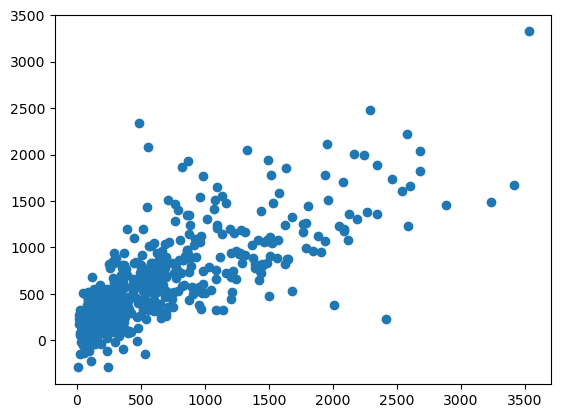

In [17]:
plt.scatter(y_test, preds)

C:\Users\JINEN RATHORE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


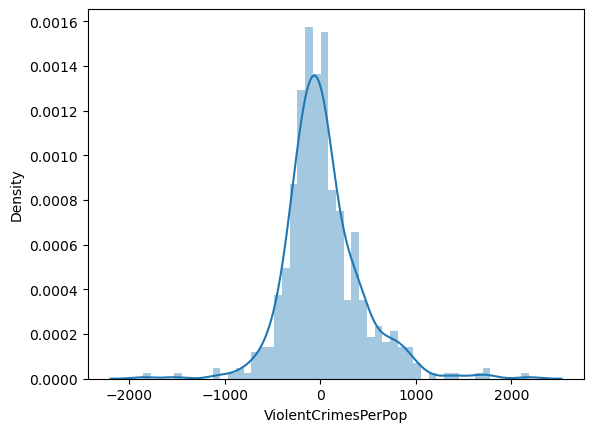

In [18]:
sns.distplot((y_test-preds),bins=50);

In [19]:
from sklearn import metrics

In [20]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 400.34019322076074


In [21]:
p = lm.predict(crimeTest.drop("ID", axis = 1))

In [22]:
crime_df = pd.DataFrame({"Prediction":p})
ID = crimeTest["ID"]

In [23]:
result = pd.concat([ID,crime_df], axis=1, join='inner')
display(result)

ID   Prediction
0      1   658.074340
1      2   322.097845
2      3   618.950254
3      4   712.123125
4      5   818.032027
5      6   210.233947
6      7  1171.541480
7      8   187.904797
8      9  1438.194825
9     10   789.365479
10    11   196.990139
11    12   332.066579
12    13   118.682809
13    14   202.870706
14    15  1039.989843
15    16  1285.900626
16    17   749.963721
17    18   232.018020
18    19  1249.125886
19    20  1559.858083
20    21   413.307965
21    22   444.986813
22    23  1035.556110
23    24   129.578621
24    25   903.131653
25    26   214.847324
26    27   920.544784
27    28   706.581398
28    29   398.346333
29    30   399.970291
30    31   244.211689
31    32   314.419413
32    33   240.603728
33    34   460.864354
34    35   322.828348
35    36    70.120802
36    37   179.351124
37    38   301.887867
38    39   982.807505
39    40   -20.562945
40    41     4.073768
41    42  1322.754954
42    43   241.914812
43    44   399.554823
44    45   991.027025
45    46    62.198305
46    47   520.513158
47    48   116.913973
48    49   810.789553
49    50   248.828077
50    51   751.690571
51    52   436.500712
52    53   980.017642
53    54   595.322106
54    55  -150.866074
55    56   537.403053
56    57  1256.411696
57    58   259.681964
58    59   117.195924
59    60   786.553497
60    61   339.672432
61    62    23.786183
62    63   557.989538
63    64   383.705764
64    65  1027.762577
65    66   741.637387
66    67   562.083110
67    68   513.693228
68    69   991.502352
69    70   724.241811
70    71   217.992526
71    72   335.282129
72    73   113.654542
73    74   535.441487
74    75   -45.740145
75    76   216.537188
76    77   188.523542
77    78   190.818118
78    79   416.062279
79    80   148.076188
80    81   290.504172
81    82   941.225680
82    83   331.740676
83    84    40.990287
84    85   609.460187
85    86   676.054505
86    87   241.911318
87    88    95.458644
88    89  2271.278172
89    90  -161.086384
90    91   617.828251
91    92   587.400327
92    93   106.667441
93    94   489.676948
94    95   185.667335
95    96   620.225754
96    97   752.013439
97    98   106.559093
98    99   849.753813
99   100  1039.626384
100  101   654.893236
101  102  1448.474128
102  103   167.190364
103  104   290.797431
104  105   285.025041
105  106   683.499075
106  107  2673.266516
107  108   214.252297
108  109   489.319200
109  110  1445.461339
110  111   450.552827
111  112   539.299492
112  113   265.842901
113  114   221.980328
114  115   140.947138
115  116  1363.353080
116  117   146.331505
117  118    15.887782
118  119   415.742488
119  120  1673.522373
120  121   183.731697
121  122  1155.130989
122  123   806.433382
123  124    12.255797
124  125   293.730384
125  126   354.848202
126  127  1967.158936
127  128   473.302102
128  129  2842.785777
129  130   345.839983
130  131   228.115769
131  132  1110.611031
132  133   139.178187
133  134   112.621552
134  135   506.077899
135  136   104.959183
136  137  1190.291629
137  138   284.159453
138  139   131.789067
139  140   496.073215
140  141   803.425358
141  142   261.020157
142  143   872.978198
143  144    95.986514
144  145  1648.173648
145  146   480.343347
146  147   493.875250
147  148   -69.757525
148  149   406.242460
149  150   306.289963
150  151   782.238465
151  152   376.451840
152  153   113.575826
153  154   979.470780
154  155  1105.254541
155  156   449.441923
156  157   536.350266
157  158   976.245349
158  159   147.341110
159  160   558.511369
160  161   476.587441
161  162   398.801018
162  163    78.302982
163  164   406.536398
164  165  1202.797514
165  166  1259.540604
166  167   532.706445
167  168   567.421706
168  169    79.358775
169  170   503.037020
170  171    81.542107
171  172   231.960584
172  173   354.940227
173  174   845.105025
174  175   154.889937
175  176   138.013829
176  177   412.742803
177  178    -0.946318
178  179   273.420581
179  180   212.529652
180  181   727.100442
18

In [24]:
result.to_csv('results.csv', index=False)

In [25]:
plm = PolynomialFeatures(degree=3)

In [26]:
p = plm.fit_transform(X_train)

In [27]:
plm.fit(X_train, y_train)

PolynomialFeatures(degree=3)

In [28]:
lm = LinearRegression()
lm.fit(p, y_train)

LinearRegression()

In [29]:
lm.coef_

array([ 7.28208504e-14,  1.16113135e-14,  4.01245455e-15, ...,
       -2.63268451e-12, -3.43878202e-12, -4.34553196e-12])

In [30]:
preds = lm.predict(plm.fit_transform(X_test))

In [31]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 4357670.495305699
